In [5]:
import numpy as np
import pandas as pd
import os
import json
import h5py
import sys
import pdb
import argparse
from sklearn.metrics import confusion_matrix
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
import seaborn as sns

import print_per_user_conf_mat
import data_utils

%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# FDIR = '../openface_data/gest_data_38_2/correct_gests_38'
FDIR = '../data_cardiff/openface_h5'
#pred_h5 = '../conv_lstm/torch/results_multi_scale_conv_lstm/' + \
#            'ang_velocity/exp1_zface_all_small_values/cp_30/pred.h5'
pred_h5 = '/tmp/mohit_delete_3/cp_train_5/pred.h5'
all_preds_dir = '/file3/mohit/final_experiments/cardiff_num_scales_3'

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


File 009_P5_P3_2202_C1.h5 stats:

===== Confusion matrix =====
[[755  56  22  55   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


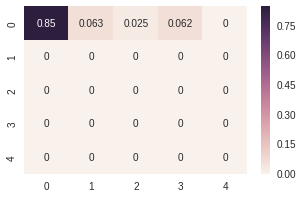

File 010_P5_P3_2202_C2.h5 stats:

===== Confusion matrix =====
[[209  39  11   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


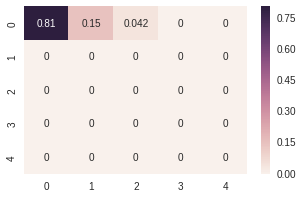

File 011_P6_P2_1602_C1.h5 stats:

===== Confusion matrix =====
[[196  14   0  12   0]
 [  0  74   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


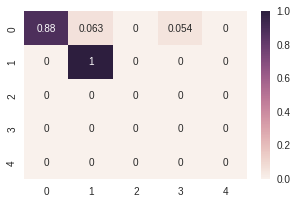

File 012_P6_P2_1602_C2.h5 stats:

===== Confusion matrix =====
[[115  54  16   0   0]
 [  0 103   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


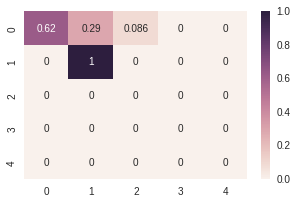

File 013_P6_P3_1602_C1.h5 stats:

===== Confusion matrix =====
[[1012  188   70   99    0]
 [  42   74    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


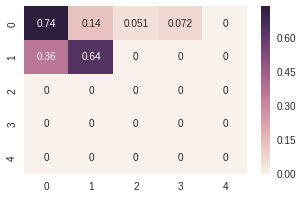

File 014_P6_P3_1602_C2.h5 stats:

===== Confusion matrix =====
[[499  19  12  57   5]
 [ 24  92   0   0   0]
 [  0   0   0   0   0]
 [118   0   0   0   0]
 [  0   0   0   0   0]]


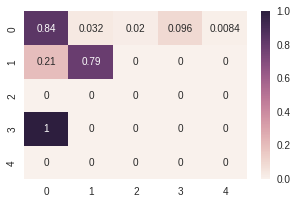

File 015_P6_P4_1602_C1.h5 stats:

===== Confusion matrix =====
[[238   6  15   0   0]
 [ 38  73   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


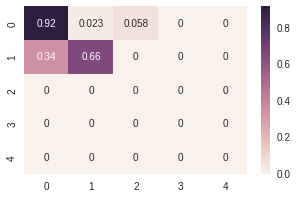

File 016_P6_P4_1602_C2.h5 stats:

===== Confusion matrix =====
[[235  41   0   4   2]
 [ 75  13   0   0   0]
 [  4   0  14   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


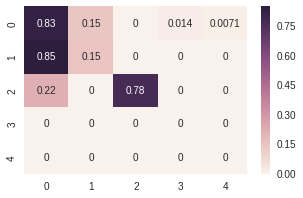

File all stats:

===== Confusion matrix =====
[[ 3259.   417.   146.   227.     7.]
 [  179.   429.     0.     0.     0.]
 [    4.     0.    14.     0.     0.]
 [  118.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.]]


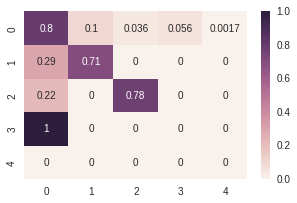

In [6]:
def plot_conf(norm_conf):
    # Plot using seaborn
    # (this is style I used for ResNet matrix)
    df_cm = pd.DataFrame(norm_conf)
    plt.figure(figsize = (5,3))
    sns.heatmap(df_cm, annot=True)
    plt.show()
    
all_conf_mat = print_per_user_conf_mat.get_all_user_conf_mat(FDIR, pred_h5)
for npfile, conf in sorted(all_conf_mat.iteritems()):
    norm_conf = data_utils.normalize_conf(conf)
    f1_score = data_utils.get_f1_score(conf, weights=[1.,1.,1.,1.,1.])
    print('File {} stats:'.format(npfile))
    print_per_user_conf_mat.print_conf_matrix(conf)
    plot_conf(norm_conf)

In [7]:
for pred_dir in os.listdir(all_preds_dir):
    if (pred_dir.startswith('pred_cp_') and 
        os.path.exists(os.path.join(all_preds_dir, pred_dir+'/pred.h5'))):
        pred_h5 = os.path.join(all_preds_dir, pred_dir+'/pred.h5')
        all_conf_mat = print_per_user_conf_mat.get_all_user_conf_mat(FDIR, pred_h5)
        for npfile, conf in sorted(all_conf_mat.iteritems()):
            if npfile == 'all':
                norm_conf = data_utils.normalize_conf(conf)
                f1_score = data_utils.get_f1_score(conf, weights=[1.,1.,1.,1.,1.])
                print('File {} stats:'.format(pred_dir))
                print_per_user_conf_mat.print_conf_matrix(conf)
                plot_conf(norm_conf)

OSError: [Errno 2] No such file or directory: '/file3/mohit/final_experiments/cardiff_num_scales_3'